In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [76]:
T = 50

In [77]:
X = np.linspace(0, 2, T)
X[[0, 1, 2, -3, -2, -1]]

array([0.        , 0.04081633, 0.08163265, 1.91836735, 1.95918367,
       2.        ])

In [78]:
X.mean()

1.0

### Moving Average
$\overline{X}_T = (1 - \alpha) \overline{X}_{T - 1} + \alpha \overline{X}_T$

- If $\alpha = \frac{1}{T}$, we get regular sample mean.
- If we replace $\frac{1}{T}$ with constant, we will no longer have sample mean.
- It will give us **Exponentially Weighted Moving Average(EWMA)**.
- $\alpha$ as function of X -
	- $\alpha = \frac{\overline{X}_{T - 1} - \overline{X}_T} {\overline{X}_{T - 1} + \overline{X}_T} $

In [93]:
ex_mean = [0]
reg_mean = [0]
alpha = 0.99
for t in range(1, T) :
    reg_mean.append(np.mean(X[:t]))
    ex_mean.append((1 - alpha) * ex_mean[-1] + (alpha * X[t]))

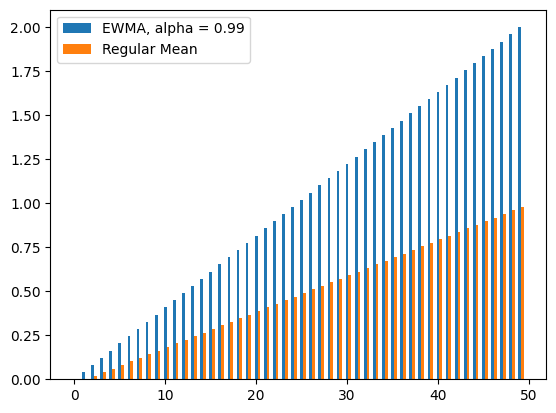

In [94]:
width = 0.3  # the width of the bars
x = np.arange(T )
plt.bar(x - width/2, ex_mean, align='edge', width = width, label = f'EWMA, alpha = {alpha}')
plt.bar(x + width/2, reg_mean, align='edge', width = width, label = 'Regular Mean')
plt.legend()

In [111]:
reg_mean_2 = [0]
alpha_hist = [0]
alpha = 0.99
for t in range(1, T) :
    reg_mean_2.append(np.mean(X[:t]))
    alpha = np.divide(reg_mean_2[-2] - reg_mean_2[-1], reg_mean_2[-2] + reg_mean_2[-1] + 10e-8) * -1
    alpha_hist.append(alpha)

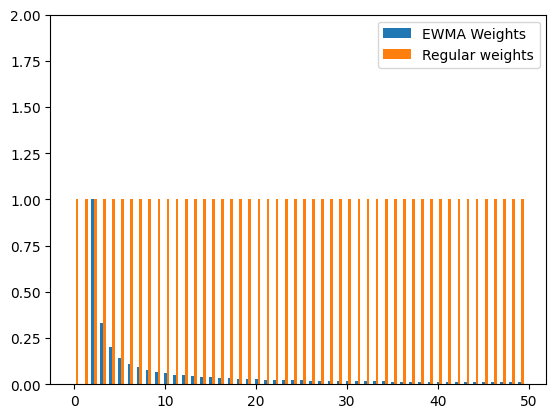

In [113]:
plt.bar(x - width/2, alpha_hist, align='edge', width = width, label = 'EWMA Weights')
plt.bar(x + width/2, 1, align = 'edge', width = width, label = 'Regular weights')
plt.ylim(0, 2)
plt.legend()